Experiment 1 - Fusion

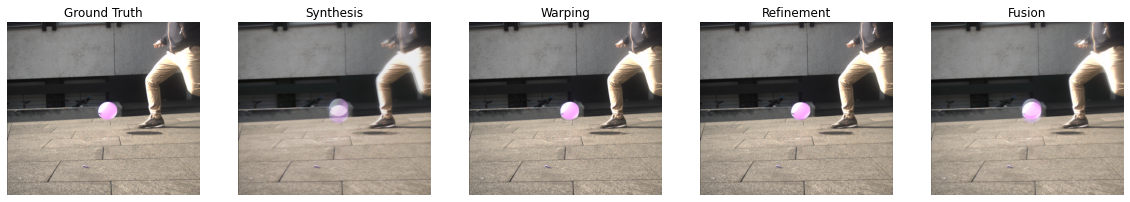

In [19]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20, 20))
rows = 1
columns = 5
path = './Drive/balloon/NC/'
file_name = ['Ground Truth', 'Synthesis', 'Warping', 'Refinement', 'Fusion']
cnt = 1
for i in range(len(file_name)):
    image = plt.imread(path + file_name[i] + '.png')
    fig.add_subplot(rows, columns, cnt)
    plt.title(file_name[i])
    plt.imshow(image)
    cnt+=1
    plt.axis('off')



In [1]:
def combiner(gt, synthesis, warping, refinement, w, h):

  gt = cv2.cvtColor(cv2.imread(gt), cv2.COLOR_BGR2RGB)

  images = np.zeros((h, w, 3, 3), np.uint8)

  images[:, :, :, 0] = cv2.cvtColor(cv2.imread(synthesis), cv2.COLOR_BGR2RGB)

  images[:, :, :, 1] = cv2.cvtColor(cv2.imread(warping), cv2.COLOR_BGR2RGB)

  images[:, :, :, 2] = cv2.cvtColor(cv2.imread(refinement), cv2.COLOR_BGR2RGB)

  final = images.max(axis=3)

  return final

In [2]:
import math
from skimage.metrics import structural_similarity as compare_ssim
def calculateMetrics(gt, result):
  psnr(gt, result)
  ssim = calculate_ssim(gt, result)
  print(f"SSIM: {ssim}%")

def psnr(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if mse == 0:
    return 100
  # print(f"MSE: {mse}")
  PIXEL_MAX = 255.0
  psnr_val = 20 * math.log10(PIXEL_MAX / math.sqrt(mse))
  print(f"PSNR: {psnr_val}")
  return psnr_val

def calculate_ssim(gt, result):
  grayGT = cv2.cvtColor(gt, cv2.COLOR_BGR2GRAY)
  grayRes = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
  (score, diff) = compare_ssim(grayGT, grayRes, full=True)
  diff = (diff * 255).astype("uint8")
  return score
  

PSNR: 34.89734152409636
SSIM: 0.9289082036982754%


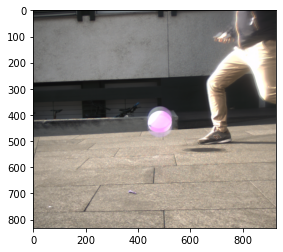

In [18]:
import cv2
balloon_cc = combiner(

    "./Drive/balloon/NC/Ground Truth.png",

    './Drive/balloon/NC/Synthesis.png',

    './Drive/balloon/NC/Warping.png',

    './Drive/balloon/NC/Refinement.png',

    928,

    832

)

gt = cv2.cvtColor(cv2.imread("./Drive/balloon/NC/Ground Truth.png"), cv2.COLOR_BGR2RGB)

plt.imshow(balloon_cc)

calculateMetrics(gt, balloon_cc)

import PIL

PIL.Image.fromarray(balloon_cc).save("./Drive/balloon/NC/Fusion.png")

Experiment 2 - Color Correction - Combined

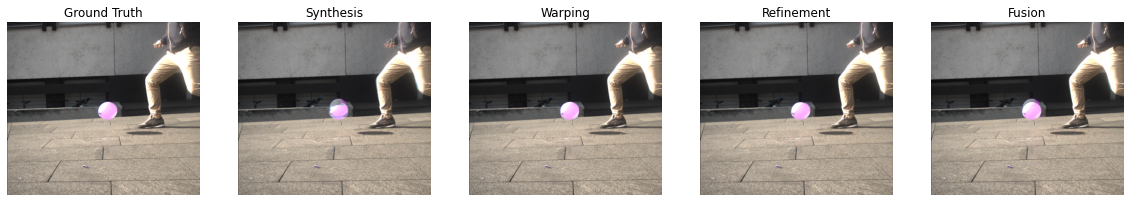

In [20]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20, 20))
rows = 1
columns = 5
path = './Drive/balloon/CC/'
file_name = ['Ground Truth', 'Synthesis', 'Warping', 'Refinement', 'Fusion']
cnt = 1
for i in range(len(file_name)):
    image = plt.imread(path + file_name[i] + '.png')
    fig.add_subplot(rows, columns, cnt)
    plt.title(file_name[i])
    plt.imshow(image)
    cnt+=1
    plt.axis('off')



Experiment 3 - Averaging

#### Synthesis

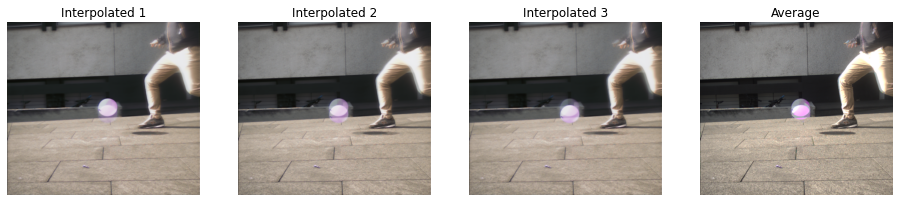

In [21]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20, 20))
rows = 1
columns = 5
path = './Drive/average_balloon/synthesis/Res/'
file_name = ['Interpolated 1', 'Interpolated 2', 'Interpolated 3', 'Average']
cnt = 1
for i in range(len(file_name)):
    image = plt.imread(path + file_name[i] + '.png')
    fig.add_subplot(rows, columns, cnt)
    plt.title(file_name[i])
    plt.imshow(image)
    cnt+=1
    plt.axis('off')



#### Warping

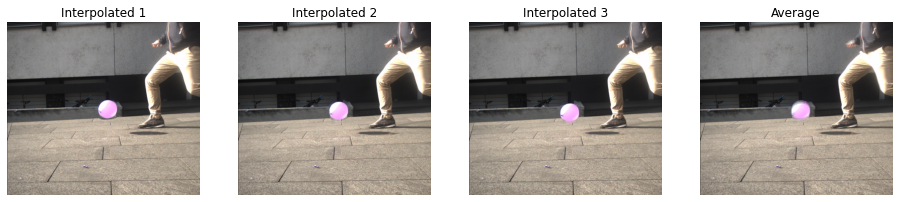

In [23]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20, 20))
rows = 1
columns = 5
path = './Drive/average_balloon/warping/Res/'
file_name = ['Interpolated 1', 'Interpolated 2', 'Interpolated 3', 'Average']
cnt = 1
for i in range(len(file_name)):
    image = plt.imread(path + file_name[i] + '.png')
    fig.add_subplot(rows, columns, cnt)
    plt.title(file_name[i])
    plt.imshow(image)
    cnt+=1
    plt.axis('off')



#### Refinement

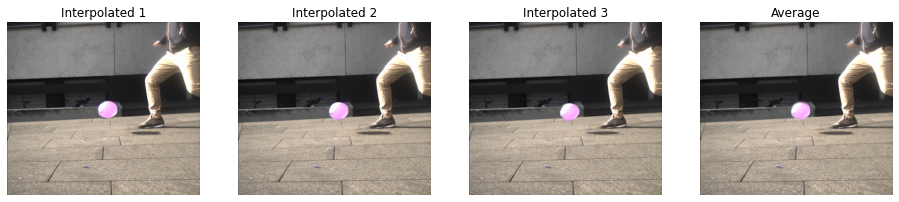

In [24]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20, 20))
rows = 1
columns = 5
path = './Drive/average_balloon/refinement/'
file_name = ['Interpolated 1', 'Interpolated 2', 'Interpolated 3', 'Average']
cnt = 1
for i in range(len(file_name)):
    image = plt.imread(path + file_name[i] + '.png')
    fig.add_subplot(rows, columns, cnt)
    plt.title(file_name[i])
    plt.imshow(image)
    cnt+=1
    plt.axis('off')



PSNR: 45.67646520922996
SSIM: 0.9891884095045774%


(-0.5, 927.5, 831.5, -0.5)

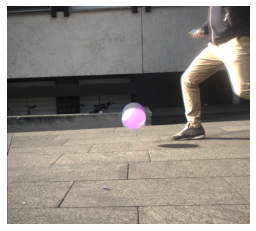

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
balloon_cc = combiner(

    "./Drive/balloon/NC/Ground Truth.png",

    './Drive/average_balloon/synthesis/Res/Average.png',

    './Drive/average_balloon/refinement/Average.png',

    './Drive/average_balloon/warping/Res/Average.png',

    928,

    832

)

gt = cv2.cvtColor(cv2.imread("./Drive/balloon/NC/Ground Truth.png"), cv2.COLOR_BGR2RGB)

plt.imshow(balloon_cc)

calculateMetrics(gt, balloon_cc)

import PIL

PIL.Image.fromarray(balloon_cc).save("./Drive/average_balloon/Fusion.png")
plt.axis('off')

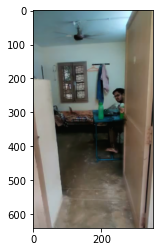

In [30]:
import matplotlib.pyplot as plt
import cv2
bear_comb = combiner(

    "./Drive/voting/gt.png",
    "./Drive/voting/eash.png",
    "./Drive/voting/sk.png",
    "./Drive/voting/var.png",


    352,

    640

)
import numpy as np


plt.imshow(bear_comb)



import PIL

PIL.Image.fromarray(bear_comb).save("./Drive/voting/combined.png")


In [33]:
gt = cv2.cvtColor(cv2.imread("./Drive/voting/var.png"), cv2.COLOR_BGR2RGB)
trial = cv2.cvtColor(cv2.imread("./Drive/voting/voted-combined.png"), cv2.COLOR_BGR2RGB)
calculateMetrics(gt, trial)

SSIM: 1.0%


In [12]:
from PIL import Image
def adjuster(r1, r2, diff, gt, image):
  mask1 = np.where((diff >= r1) & (diff < (r1 + 1)))
  mask2 = np.where((diff >= r2) & (diff < (r2 + 1)))
  print(mask1[0].size, mask2[0].size)
  image[mask1] += r1
  image[mask2] -= r1
  diff_array = np.absolute(np.array(gt) - np.array(image))
  unique, counts = np.unique(diff_array, return_counts=True)
  print(unique)
  print(counts)
  print(f"For Val: {r1} and {r2 - 256}")
  calculateMetrics(gt, image)
  modified_img = Image.fromarray(image, 'RGB')
  return modified_img

In [13]:
GT = cv2.cvtColor(cv2.imread('./Drive/var/voting_bear/gt.jpg'), cv2.COLOR_BGR2RGB)
PRED = cv2.cvtColor(cv2.imread('./Drive/var/voting_bear/combined.png'), cv2.COLOR_BGR2RGB)
diff = np.absolute(np.array(GT) - np.array(PRED))
for i in reversed(range(200, 256)):
  if i == 200:
    result_img = adjuster(256 - i, i, diff, GT, PRED)
  adjuster(256 - i, i, diff, GT, PRED)
result_img.save('./Drive/var/voting_bear/Fusion-CC.png')

2441 1016581
[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  30  31  32  33  34  35  36  37  38
  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 2

In [29]:
GT = cv2.cvtColor(cv2.imread('./Drive/average_balloon/warping/gt.png'), cv2.COLOR_BGR2RGB)
PRED = cv2.cvtColor(cv2.imread('./Drive/average_balloon/Fusion.png'), cv2.COLOR_BGR2RGB)
diff = np.absolute(np.array(GT) - np.array(PRED))
for i in reversed(range(200, 256)):
  if i == 200:
    result_img = adjuster(256 - i, i, diff, GT, PRED)
  adjuster(256 - i, i, diff, GT, PRED)
result_img.save('./Drive/average_balloon/Fusion-CC.png')

195 337745
[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  22  23  26  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  97  98  99 100 102
 103 104 105 106 107 108 110 111 112 113 114 115 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 228 230 235 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254]
[2092827     197     144     106     119     111      8

Experiment - 4 - Voting

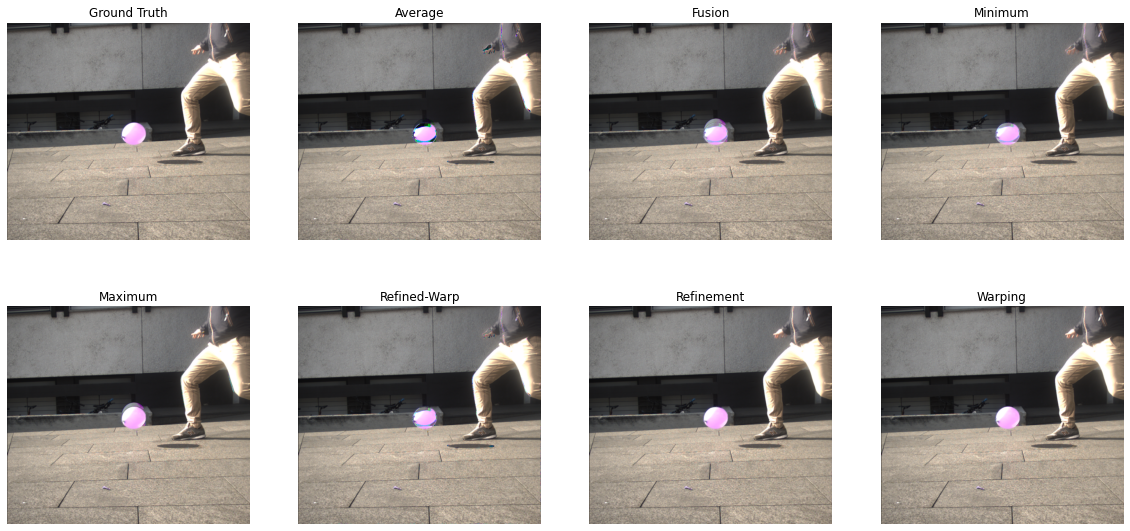

In [38]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20, 20))
rows = 4
columns = 4
path = './Drive/voting_balloon/'
file_name = ['Ground Truth' ,'Average', 'Fusion', 'Minimum', 'Maximum', 'Refined-Warp','Refinement', 'Warping']
cnt = 1
for i in range(len(file_name)):
    image = plt.imread(path + file_name[i] + '.png')
    fig.add_subplot(rows, columns, cnt)
    plt.title(file_name[i])
    plt.imshow(image)
    cnt+=1
    plt.axis('off')



Experiment - 5 - Various Datasets

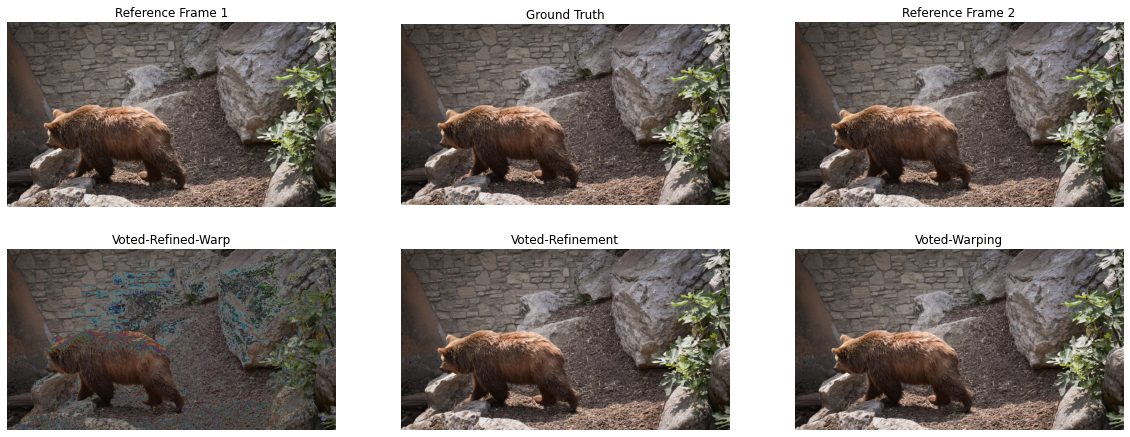

In [21]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20, 20))
rows = 5
columns = 3
path = './Drive/voting_bear/'
file_name = ['Reference Frame 1','Ground Truth', 'Reference Frame 2', 'Voted-Refined-Warp', 'Voted-Refinement', 'Voted-Warping']
cnt = 1
for i in range(len(file_name)):
    if(file_name[i] == 'Ground Truth' or file_name[i] == 'Reference Frame 1' or file_name[i] == 'Reference Frame 2'):
        image = plt.imread(path + file_name[i] + '.jpg')
    else:
        image = plt.imread(path + file_name[i] + '.png')
    fig.add_subplot(rows, columns, cnt)
    plt.title(file_name[i])
    plt.imshow(image)
    cnt+=1
    plt.axis('off') 

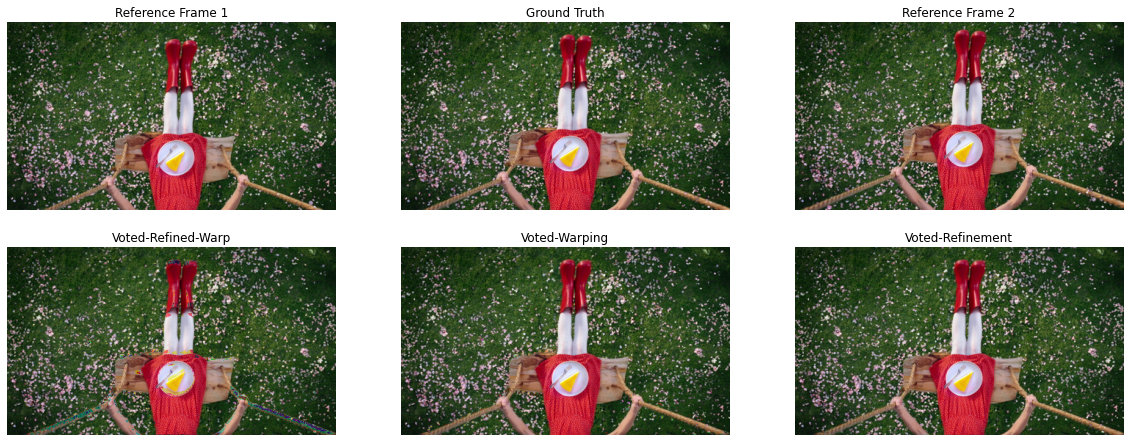

In [25]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20, 20))
rows = 5
columns = 3
path = './Drive/voting_swing/'
file_name = ['Reference Frame 1' ,'Ground Truth', 'Reference Frame 2','Voted-Refined-Warp', 'Voted-Warping','Voted-Refinement']
cnt = 1
for i in range(len(file_name)):
    image = plt.imread(path + file_name[i] + '.png')
    fig.add_subplot(rows, columns, cnt)
    plt.title(file_name[i])
    plt.imshow(image)
    cnt+=1
    plt.axis('off') 

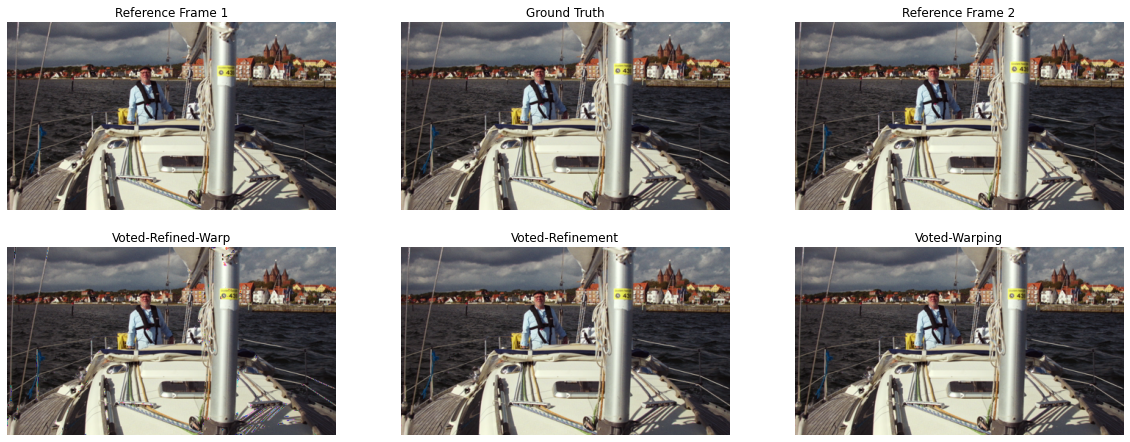

In [26]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20, 20))
rows = 5
columns = 3
path = './Drive/voting_boat/'
file_name = ['Reference Frame 1','Ground Truth', 'Reference Frame 2', 'Voted-Refined-Warp', 'Voted-Refinement', 'Voted-Warping']
cnt = 1
for i in range(len(file_name)):
    image = plt.imread(path + file_name[i] + '.png')
    fig.add_subplot(rows, columns, cnt)
    plt.title(file_name[i])
    plt.imshow(image)
    cnt+=1
    plt.axis('off') 

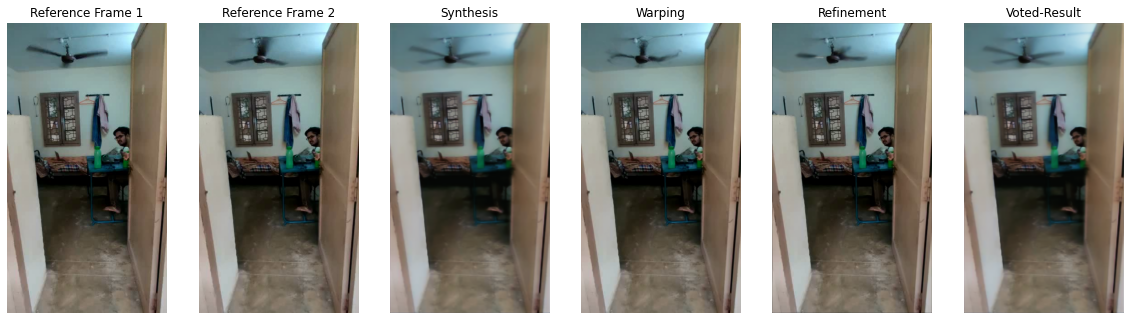

In [41]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20, 20))
rows = 1
columns = 6
path = './Drive/voting/'
file_name = ['Reference Frame 1', 'Reference Frame 2', 'Synthesis', 'Warping', 'Refinement', 'Voted-Result']
cnt = 1
for i in range(len(file_name)):
    image = plt.imread(path + file_name[i] + '.png')
    fig.add_subplot(rows, columns, cnt)
    plt.title(file_name[i])
    plt.imshow(image)
    cnt+=1
    plt.axis('off') 

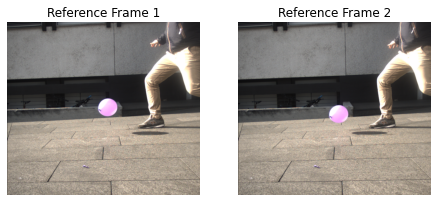

In [7]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20, 20))
rows = 1
columns = 5
path = './Drive/voting_balloon/'
file_name = ['Reference Frame 1', 'Reference Frame 2']
cnt = 1
for i in range(len(file_name)):
    image = plt.imread(path + file_name[i] + '.png')
    fig.add_subplot(rows, columns, cnt)
    plt.title(file_name[i])
    plt.imshow(image)
    cnt+=1
    plt.axis('off')

